## Интеллектуальный анализ данных – весна 2024
## kNN. Линейные модели. Работа с признаками

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.sample(8)
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

Задача 1.1
 Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [ ]:
#Пропущенных значений нет юхууу
null_values = X.isnull().sum().sum()
if null_values > 0:
    print("ЪУЪ")
    X.dropna(inplace=True)

#категориальных признаков тоже юхууу
categorical_vars = X.select_dtypes(include=['object']).columns

if len(X.select_dtypes(include=['object']).columns) > 0:
    print("SIUUUUUUUUUUUUUUUUUUUUUUUUUUUUU")
    X_encoded = OneHotEncoder().fit_transform(X[categorical_vars])
    X.drop(columns=categorical_vars, inplace=True)
    X = pd.concat([X, pd.DataFrame(X_encoded.toarray(), columns=OneHotEncoder().get_feature_names(categorical_vars))], axis=1)

**Задача 1.2** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

len(X_test) / len(X) #Да, объем тестовой выборки равен 0.3



0.30337078651685395

Важно использовать stratify, потому что это позволит сохранить пропорции классов в выборках. Какие-то редкие значечения могут неправильно распределиться и это ухудшит работу модели

**Задача 1.3** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

### ПРИМЕР ВЫВОДА ###
NN 	 Train 	 Test
1 	 1.0 	 0.56
3 	 0.83 	 0.61
5 	 0.81 	 0.63
10 	 0.79 	 0.54
15 	 0.74 	 0.57
25 	 0.76 	 0.56


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Выделение признаков alcohol и magnesium
X_subset = X[['alcohol', 'magnesium']]
X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.3, stratify=y, random_state=42)


# Масштабирование признаков
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

neighbors = [1, 3, 5, 10, 15, 25]
for n_neighbors in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, y_train)

    # Предсказание на обучающей выборке
    train_pred = knn.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, train_pred)

    # Предсказание на тестовой выборке
    test_pred = knn.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, test_pred)

    print(f"kNN с числом соседей {n_neighbors}:")
    print(f"Доля правильных ответов на обучающей выборке: {train_accuracy:.4f}")
    print(f"Доля правильных ответов на тестовой выборке: {test_accuracy:.4f}")
    print()


kNN с числом соседей 1:
Доля правильных ответов на обучающей выборке: 1.0000
Доля правильных ответов на тестовой выборке: 0.5370

kNN с числом соседей 3:
Доля правильных ответов на обучающей выборке: 0.7984
Доля правильных ответов на тестовой выборке: 0.6296

kNN с числом соседей 5:
Доля правильных ответов на обучающей выборке: 0.7823
Доля правильных ответов на тестовой выборке: 0.7037

kNN с числом соседей 10:
Доля правильных ответов на обучающей выборке: 0.7500
Доля правильных ответов на тестовой выборке: 0.6852

kNN с числом соседей 15:
Доля правильных ответов на обучающей выборке: 0.7177
Доля правильных ответов на тестовой выборке: 0.6481

kNN с числом соседей 25:
Доля правильных ответов на обучающей выборке: 0.6935
Доля правильных ответов на тестовой выборке: 0.6667



**Задача 1.4** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

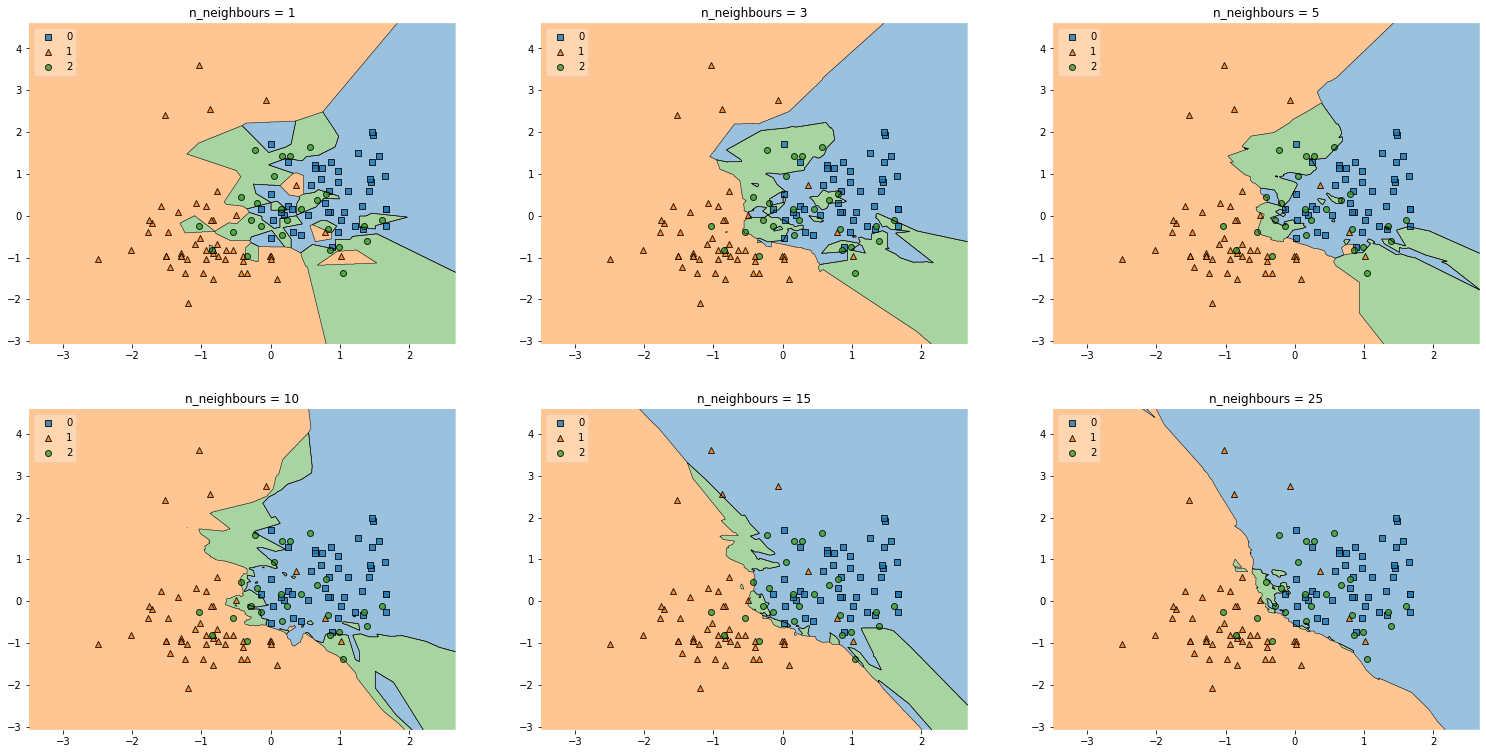

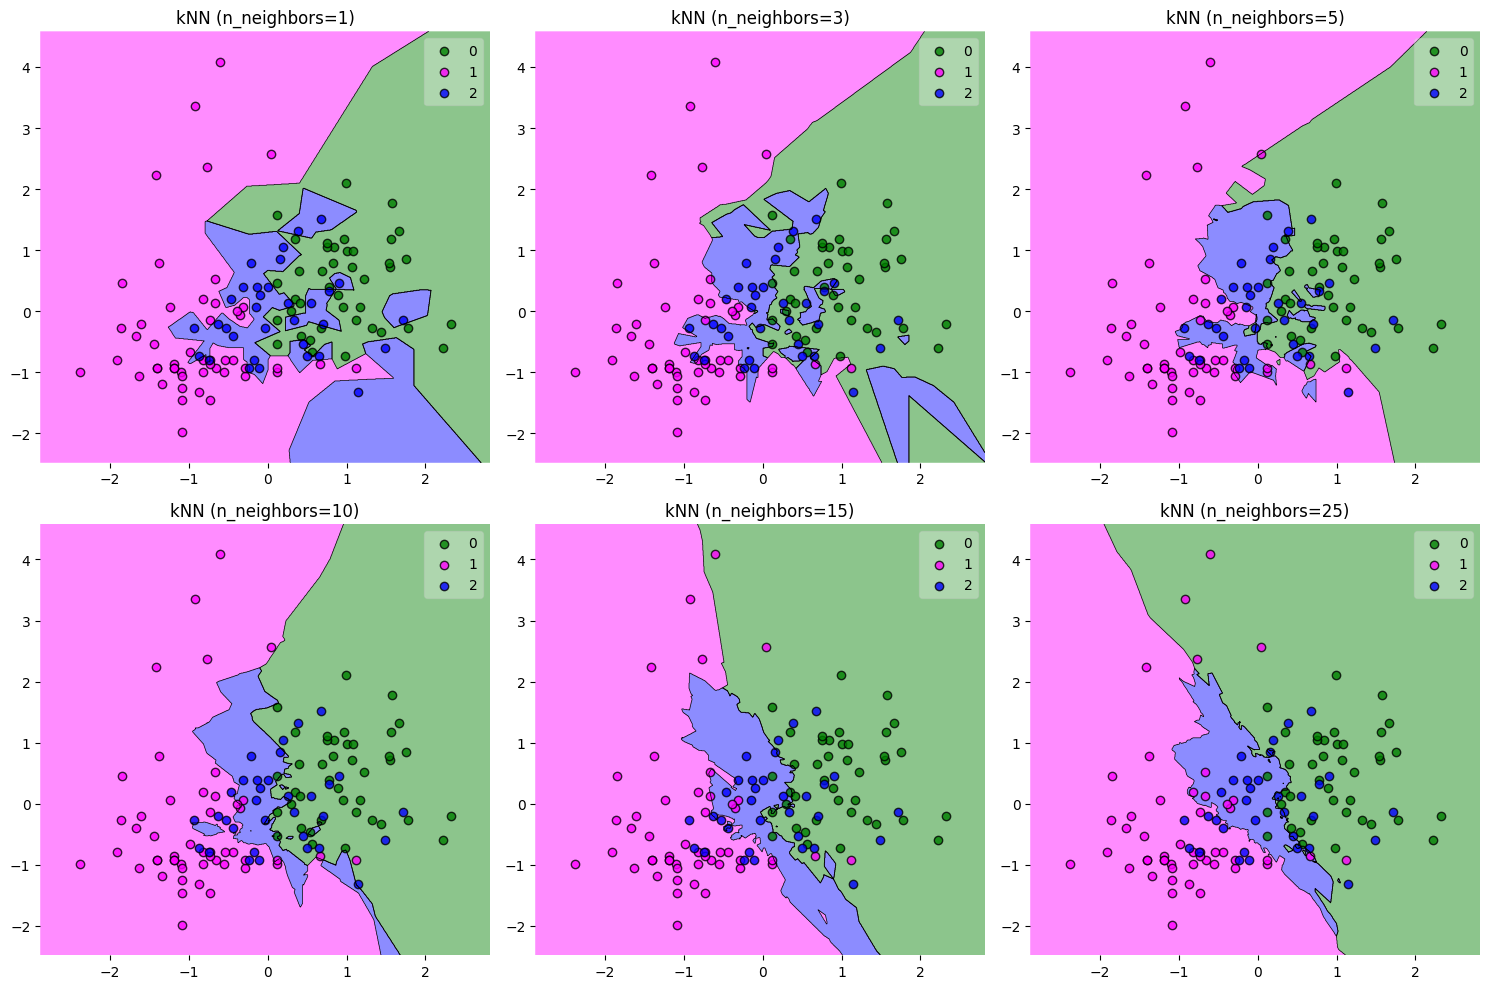

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from itertools import product

# Создаем сетку графиков
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Создаем список классификаторов kNN с разным числом соседей
classifiers = [KNeighborsClassifier(n_neighbors=n) for n in [1, 3, 5, 10, 15, 25]]

# Обучаем каждый классификатор
for knn, ax, n_neighbors in zip(classifiers, axes.flatten(), [1, 3, 5, 10, 15, 25]):
    knn.fit(X_train_scaled, y_train)
    plot_decision_regions(X_train_scaled, y_train, clf=knn, ax=ax, markers='o', colors='green,magenta,blue', zoom_factor=2.0)
    ax.set_title(f'kNN (n_neighbors={n_neighbors})')

plt.tight_layout()
plt.show()


**Задача 1.6** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

Проанализировав, мы можем сказать, что самым опитмальным будет число соседей равное 5, потому что на тестовой выборке у данной модели самый хороший результат, далее результат ухудшается

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

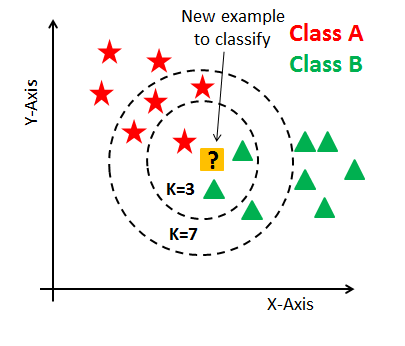

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
      # Запоминаем гиперпараметр - число соседей
      self.k = k

    def fit(self, X, y):
      # Обучаем: просто запоминаем обучающую выборку
      self.X_train = X
      self.y_train = y

    def predict(self, X):
      return np.array([self._predict_for_one(x) for x in X])

    def _predict_for_one(self, x):
      # Считаем расстояние от объекта тестовой выборки до каждого из обучающей
      distances = self.count_distance(x, self.X_train)

      # Получаем индексы k ближайших объектов
      k_nearest_neighbours_ind = np.argsort(distances)[:self.k]

      # Получаем классы k ближайших объектов
      classes_of_k_nearest_neighbors = self.y_train[k_nearest_neighbours_ind]

      # Получаем самый часто встречающийся класс среди соседей
      return Counter(classes_of_k_nearest_neighbors).most_common(1)[0][0]

    def count_distance(self, x, y):
      # Вычисляем Евклидово расстояние от x до каждого объекта в y
      return np.linalg.norm(y - x, axis=1)

In [ ]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:


# Проверка наличия пропущенных значений
print(data.isnull().sum().sum())
# Пропущенных значений нет


0


НО! Есть тупой столбец unnamed - кик его! И параллельно задаемся вопросом: зачем существовать, если в тебе никто не нуждается?
Зачем жить, если тебе уже нашли замену? Unnamed явно попал не туда, куда надо



In [ ]:
df = data.drop(columns=['Unnamed: 0'], axis = 1) #туда этот unnamed
df.sample(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
24943,2.01,Premium,J,VS2,60.5,60.0,13400,8.13,8.09,4.91
40049,0.38,Premium,E,VS2,60.5,62.0,1112,4.74,4.65,2.84
25253,1.61,Ideal,H,VS2,61.8,56.0,13873,7.48,7.52,4.63
30253,0.43,Premium,G,SI1,62.6,59.0,724,4.80,4.82,3.01
48069,0.56,Ideal,H,VVS1,60.8,57.0,1929,5.30,5.35,3.24
48524,0.54,Ideal,G,VVS2,62.1,56.0,1985,5.19,5.22,3.23
43061,0.45,Ideal,G,IF,62.8,53.0,1377,4.92,4.95,3.10
29379,0.31,Very Good,E,SI1,63.3,55.0,698,4.35,4.31,2.74
36855,0.31,Very Good,E,IF,61.6,54.0,958,4.38,4.42,2.71
43833,0.59,Ideal,H,SI1,61.1,57.0,1445,5.39,5.41,3.30


**Задача 3.2** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [ ]:
corr = df.corr()
print("Матрица выборочных корреляций:")
print(corr)

# Корреляции между вещественными признаками и целевой переменной
corr_with_target = corr['price'].drop('price')  # Удаляем корреляцию с самим собой (диагональ матрицы)
print("\nКорреляции с целевой переменной:")
print(corr_with_target)

max_corr = corr_with_target.idxmax()
print("\nПризнак с наибольшей корреляцией с целевой переменной:", max_corr)

Матрица выборочных корреляций:
          carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000

Корреляции с целевой переменной:
carat    0.921591
depth   -0.010647
table    0.127134
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64

Признак с наибольшей корреляцией с целевой переменной: carat


<ipython-input-126-4cf6d8e1e12f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Больше всего коррелирует carat, далее идут признаки x,y,z с почти одинаковой корреляцией. depth ваще шизоид в отрицательное ушел, а стол(table) есть стол - что с него взять

**Задача 3.3** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Для One-hot будем юзать get_dummies. Мое желание не бейте

In [ ]:
df2 = pd.get_dummies(df, drop_first=True)
df2.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


**Задача 3.4** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [ ]:
df2_list = df2["price"]


df3 = df2

df3


,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


Можно сделать вывод, что у нас много элементов, которые встречаются все лишь раз и мы не сможем разделить их на тестовую и обучающую выборку. Поэтому есть идея сделать через qcut(через него дичь какая-то была, не заработало). Юзаем linspace

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(52)
y = df3["price"]
bins = np.linspace(0,19000, 500)
y_binned = np.digitize(y, bins)
X = df3.drop('price', axis = 1)
y = df3['price']
# y_categorized = pd.qcut(df2_list, q=4, labels=False)

y = df3["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y_binned)


len(X_test) / len(df2)



0.3

Я СТОЛЬКО ВРЕМЕНИ ПОТЕРЯЛ НА ЭТОМ ТУПОМ qcut АОАОАОАОАОАОАОАОАОАОАОАОАОАОАОАОАО

**Задача 3.5** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [ ]:
from sklearn.preprocessing import StandardScaler

sclr = StandardScaler()
# Масштабируем вещественные признаки тренировочной выборки
Scale_Xtrain = sclr.fit_transform(X_train)
# Применяем ту же самую трансформацию к тестовой выборке
Scale_Xtest = sclr.transform(X_test)



**Задача 3.6** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Инициализируем и обучаем модель линейной регрессии
model = LinearRegression().fit(Scale_Xtrain, y_train)

# Предсказываем значения на тренировочной и тестовой выборках
y_train_pred = model.predict(Scale_Xtrain)
y_test_pred = model.predict(Scale_Xtest)

# Вычисляем среднеквадратичную ошибку на тренировочной и тестовой выборках
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Среднеквадратичная ошибка на тренировочной выборке:", mse_train)
print("Среднеквадратичная ошибка на тестовой выборке:", mse_test)


Среднеквадратичная ошибка на тренировочной выборке: 1289770.5434671168
Среднеквадратичная ошибка на тестовой выборке: 1246898.6421951884


**Задача 3.7** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [ ]:
# Выводим оценки коэффициентов
print("Оценки коэффициентов модели:")
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef}")


# Находим вещественные переменные, оценки коэффициентов которых
# по модулю на порядок превышают оценки прочих вещественных переменных
max_coef = max(abs(coefficients))
significant_features = [feature for feature, coef in zip(X_train.columns, coefficients) if abs(coef) >= max_coef / 10]

print("\nВещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных:")
print(significant_features)

Оценки коэффициентов модели:
carat: 5237.881422008128
depth: -92.89449640686303
table: -59.75103603151353
x: -1035.640931690635
y: 4.492656245125217
z: -22.487183095052856
cut_Good: 160.63642567393208
cut_Ideal: 403.64378435090674
cut_Premium: 324.34263921537354
cut_Very Good: 298.3696820108343
color_E: -75.07353362976434
color_F: -102.46563615664333
color_G: -190.0693268573734
color_H: -347.37997904389874
color_I: -431.399242600531
color_J: -521.6069108854148
clarity_IF: 976.6099133823533
clarity_SI1: 1625.4546663642432
clarity_SI2: 1066.1083356374597
clarity_VS1: 1686.4729781542576
clarity_VS2: 1843.359477698389
clarity_VVS1: 1285.2476467088732
clarity_VVS2: 1485.6094699328264

Вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных:
['carat', 'x', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']


**Задача 3.8** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha=10)
lasso.fit(Scale_Xtrain, y_train)

for feature_name, coef in zip(X_train.columns, lasso.coef_):
    print(f"{feature_name}: {coef}")

carat: 4810.322563517925
depth: -93.30667768218709
table: -66.35246222100936
x: -644.3534952336423
y: -0.0
z: -32.657759861132654
cut_Good: 45.17453077062138
cut_Ideal: 198.74781106551376
cut_Premium: 144.69244589151594
cut_Very Good: 132.3582662357731
color_E: -11.110013247866851
color_F: -39.491205995357426
color_G: -112.72679315821061
color_H: -277.46343331079066
color_I: -372.43390667721656
color_J: -467.796605728301
clarity_IF: 667.4579839777945
clarity_SI1: 883.240386277926
clarity_SI2: 417.8714405834185
clarity_VS1: 1070.30530821005
clarity_VS2: 1118.485547860286
clarity_VVS1: 851.2049335465318
clarity_VVS2: 963.8710443715362


In [ ]:
ridge = Ridge(alpha=10)
ridge.fit(Scale_Xtrain, y_train)

for feature_name, coef in zip(X_train.columns, ridge.coef_):
    print(f"{feature_name}: {coef}")

carat: 5280.826330868601
depth: -84.41239582690022
table: -56.83361684492478
x: -1074.7587600279992
y: 12.556861176913046
z: -41.77472299259003
cut_Good: 170.69147230626137
cut_Ideal: 406.9770122785261
cut_Premium: 333.4944695007173
cut_Very Good: 305.3033269616944
color_E: -80.98318444774216
color_F: -103.23124333551348
color_G: -188.00383253794178
color_H: -348.6877191756137
color_I: -442.3398582081053
color_J: -524.8161233930042
clarity_IF: 963.7428293494372
clarity_SI1: 1577.9231699404672
clarity_SI2: 1020.1263939656052
clarity_VS1: 1660.8002116897944
clarity_VS2: 1797.7164246785562
clarity_VVS1: 1262.6067787103657
clarity_VVS2: 1438.6255710309763


Lasso-регрессия обнулила вес 'y', что является индикатором отбора признаков, присущего Lasso.
И L1, и L2 регрессии незначительно уменьшили некоторые веса.
По величине изменения коэффициентов скорее нельзя судить о том, что проблема мультиколлинеарности действительно прослеживалась в изначальной модели линейной регрессии. И L1, и L2 регрессии, вероятно, улучшили модель и повысили надежность результатов.

**Задача 3.9** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

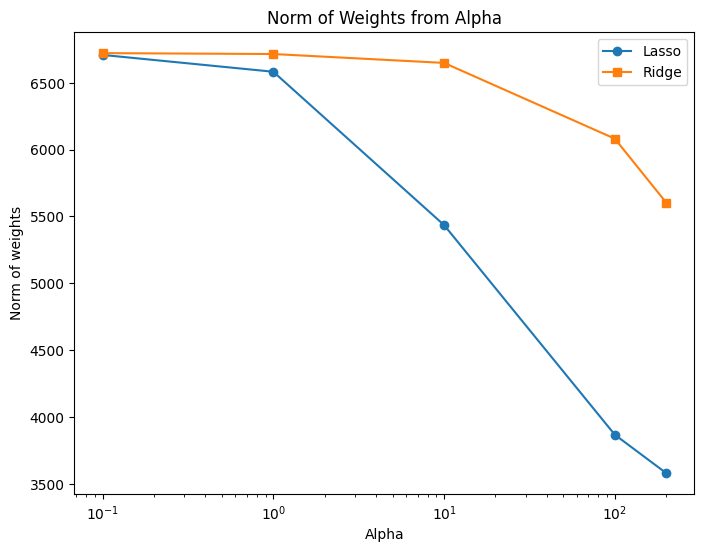

In [ ]:
alphas = [0.1, 1, 10, 100, 200]
norms_lasso = []
norms_ridge = []

for alpha in alphas:
    # Обучаем Lasso
    lasso = Lasso(alpha=alpha)
    lasso.fit(Scale_Xtrain, y_train)
    norms_lasso.append(np.linalg.norm(lasso.coef_))

    # Обучаем Ridge
    ridge = Ridge(alpha=alpha)
    ridge.fit(Scale_Xtrain, y_train)
    norms_ridge.append(np.linalg.norm(ridge.coef_))

    # Строим графики
plt.figure(figsize=(8, 6))
plt.plot(alphas, norms_lasso, label='Lasso', marker='o')
plt.plot(alphas, norms_ridge, label='Ridge', marker='s')
plt.xscale('log')  # Для наглядности
plt.xlabel('Alpha')
plt.ylabel('Norm of weights')
plt.title('Norm of Weights from Alpha')
plt.legend()
plt.show()

Lasso агрессивнее уменьшает веса(треш токсик, не люблю таких)

Lasso-регрессию часто используют для отбора признаков, так как L1-регуляризация способна обнулять коэффициенты менее важных признаков. Для минимизации общей функции стоимости модель "согласится" жертвовать некоторыми признаками (обнуляя их коэффициенты), чтобы уменьшить штраф за регуляризацию.

**Задача 3.10**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [ ]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=29)
lasso_cv.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7018534583.376892, tolerance: 48164503.05264266
  model = cd_fast.enet_coordinate_descent_gram(


LassoCV(alphas=[0.1, 1, 10, 100, 200], cv=5, random_state=29)

In [ ]:
# mse_means = lasso_cv.mse_path_.mean(axis=1)

# print("Alpha:", lasso_cv.alphas_)
# print("Средние MSE для alpha:", mse_means)

# optimal_alpha = lasso_cv.alphas_[np.argmin(mse_means)]
# print("Оптимальное alpha:", optimal_alpha)

from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas=[0.1, 1, 10, 100, 200], cv=5).fit(Scale_Xtrain, y_train)
b_a_ind = np.argmin(lasso_cv.mse_path_.mean(axis=1))
optimal_alpha = lasso_cv.alphas_[b_a_ind]
optimal_alpha

1.0

**Задача 3.11** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [ ]:
final_lasso = Lasso(alpha=optimal_alpha)
final_lasso.fit(Scale_Xtrain, y_train)

for feature_name, coef in zip(X_train.columns, final_lasso.coef_):
    print(f"{feature_name}: {coef}")

carat: 5269.585433911978
depth: -87.34850788138432
table: -57.753402679996626
x: -1059.9805171116598
y: 0.0
z: -35.54297072861776
cut_Good: 157.83564762259024
cut_Ideal: 385.45396514623746
cut_Premium: 313.84979898243677
cut_Very Good: 287.2318198571763
color_E: -74.31528765183835
color_F: -96.90510733896036
color_G: -180.89373179508223
color_H: -342.2896639047149
color_I: -436.4827367489772
color_J: -520.2491164302279
clarity_IF: 944.9784802062879
clarity_SI1: 1535.2764296793991
clarity_SI2: 982.7343162825961
clarity_VS1: 1624.2523365867748
clarity_VS2: 1755.812619748455
clarity_VVS1: 1236.737645003754
clarity_VVS2: 1409.051497292834


'y' показал нулевой или очень маленький коэффициент, что указывает на его низкую информативность

'carat' является ключевым фактором (из материальных соображений), влияющим на стоимость бриллианта, а 'clarity' и 'color' значительно влияют на его привлекательность и, соответственно, на цену.

carat' является ключевым фактором (из материальных соображений), влияющим на стоимость бриллианта, а 'clarity' и 'color' значительно влияют на его привлекательность и, соответственно, на цену.

**Задача 3.12** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [ ]:
pred_test_lasso = final_lasso.predict(Scale_Xtest)
pred_cas = model.predict(Scale_Xtest)
print(f'Linear Test: {mean_squared_error(y_test, pred_cas)}')
print(f'Lasso Test: {mean_squared_error(y_test, pred_test_lasso)}')



Linear Test: 1246898.6421951884
Lasso Test: 1246366.6737119532


Линейная регрессия оказалась НЕЗНАЧИТЕЛЬНО лучше Лассо, менее чем на 0,1%. Я бы списал такую разницу на погрешность. В целом, столь небольшая разница объяснима, ведь alpha в Лассо всего 1, и он не так сильно штрафует за большие кожффициенты.
Вероятно, для этой задачи можно было бы использовать не линейную регрессию, или добавить такие переменные, как x^3, y^3, z^3 (объем ведь кубически зависит от длины, верно). Возможно, линейная зависимость, на который основаны и Linear, и Lasso, не может усмотреть все связи.